In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('vacancies_with_keywords.csv')
df.head()

,Title,Company Name,Date,Location,Salary,Keywords Found
0,Data Analyst (Ohayu at Genesis),Genesis,13 серпня 2024,"Київ, Варшава (Польща), віддалено",NaN,"R, SQL, Tableau"
1,Data Analyst (RnD),Brainstack,3 вересня 2024,"Київ, віддалено",NaN,"Python, R, SQL, Tableau, Excel, PostgreSQL, AWS"
2,Product Analyst,WiX,5 серпня 2024,Київ,NaN,"R, SQL"
3,HR Analyst (with PowerBI),JustAnswer,27 серпня 2024,Львів,NaN,"R, SQL, Excel"
4,Data Analyst,"ТОВ ""Укр Кредит Финанс""",29 липня 2024,"Київ, віддалено",від $2000,"R, SQL, Excel"


In [85]:
from datetime import datetime

df_cleaned = df.dropna(subset=['Keywords Found'])
df_cleaned = df_cleaned.dropna(subset=['Location'])

def ukrainian_month_to_num(month):
    uk_months = {
        'січня': 1, 'лютого': 2, 'березня': 3, 'квітня': 4, 'травня': 5, 'червня': 6,
        'липня': 7, 'серпня': 8, 'вересня': 9, 'жовтня': 10, 'листопада': 11, 'грудня': 12
    }
    return uk_months.get(month.lower(), month)

def parse_ukrainian_date(date_string):
    day, month, year, *_ = date_string.split()
    month_num = ukrainian_month_to_num(month)
    return datetime(int(year), month_num, int(day))

df_cleaned['Date'] = df_cleaned['Date'].apply(parse_ukrainian_date)
df_cleaned

,Title,Company Name,Date,Location,Salary,Keywords Found
0,Data Analyst (Ohayu at Genesis),Genesis,2024-08-13,"Київ, Варшава (Польща), віддалено",NaN,"R, SQL, Tableau"
1,Data Analyst (RnD),Brainstack,2024-09-03,"Київ, віддалено",NaN,"Python, R, SQL, Tableau, Excel, PostgreSQL, AWS"
2,Product Analyst,WiX,2024-08-05,Київ,NaN,"R, SQL"
3,HR Analyst (with PowerBI),JustAnswer,2024-08-27,Львів,NaN,"R, SQL, Excel"
4,Data Analyst,"ТОВ ""Укр Кредит Финанс""",2024-07-29,"Київ, віддалено",від $2000,"R, SQL, Excel"
...,...,...,...,...,...,...
406,Junior/Middle Data Analyst (wellbeing app),SKELAR,2024-08-12,"Київ, за кордоном",NaN,"Python, R, SQL, Tableau, Excel, Google Sheets"
407,Data Analyst (Marketing),ZONE3000,2024-08-12,віддалено,NaN,"Python, R, SQL, Tableau, Power BI, Excel"
408,Junior Business Analyst,COAX Software,2024-08-12,"Івано-Франківськ, віддалено",NaN,"Python, R, AWS"
409,Product Analyst,Headway,2024-08-12,"Київ, за кордоном, віддалено",NaN,"Python, R, SQL, Tableau"


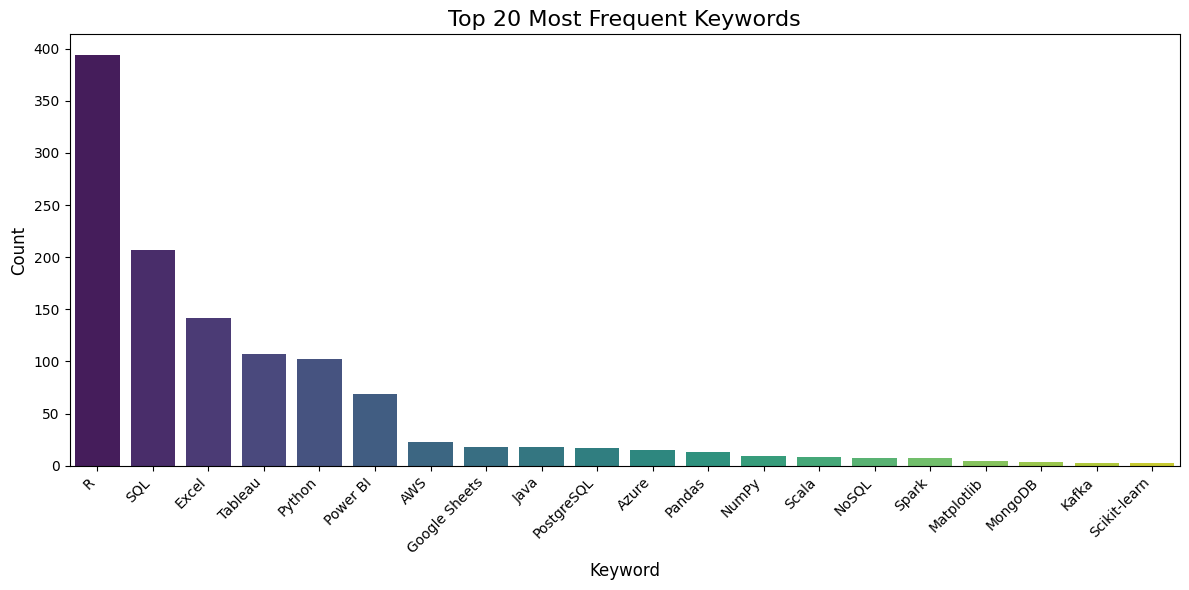

In [86]:
all_keywords = ', '.join(df_cleaned['Keywords Found']).split(', ')
keyword_counts = pd.Series(all_keywords).value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_counts.index, y=keyword_counts.values, hue=keyword_counts.index, legend=False, palette='viridis')
plt.title('Top 20 Most Frequent Keywords', fontsize=16)
plt.xlabel('Keyword', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

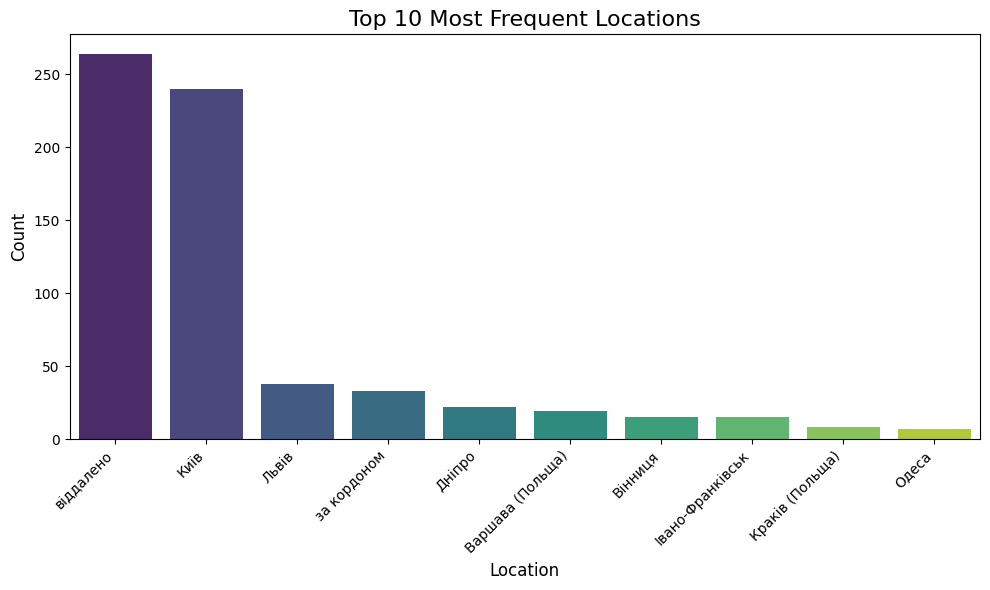

In [87]:
all_locations = ', '.join(df_cleaned['Location']).split(', ')
location_counts = pd.Series(all_locations).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, hue=location_counts.index, legend=False, palette='viridis')
plt.title('Top 10 Most Frequent Locations', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

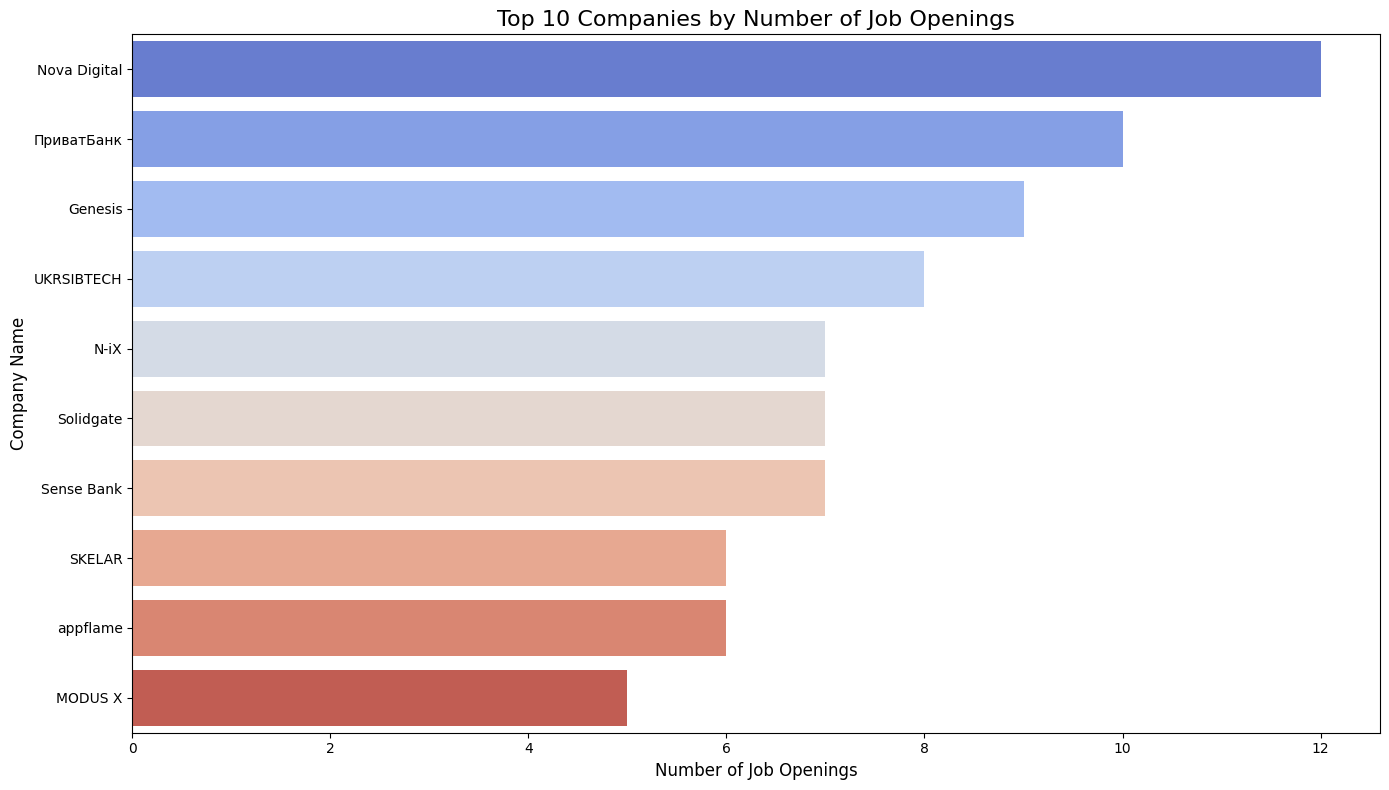

In [88]:
company_counts = df_cleaned['Company Name'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=company_counts.values[:10], y=company_counts.index[:10], hue=company_counts.index[:10], legend=False, palette='coolwarm')
plt.title('Top 10 Companies by Number of Job Openings', fontsize=16)
plt.xlabel('Number of Job Openings', fontsize=12)
plt.ylabel('Company Name', fontsize=12)
plt.tight_layout()
plt.show()

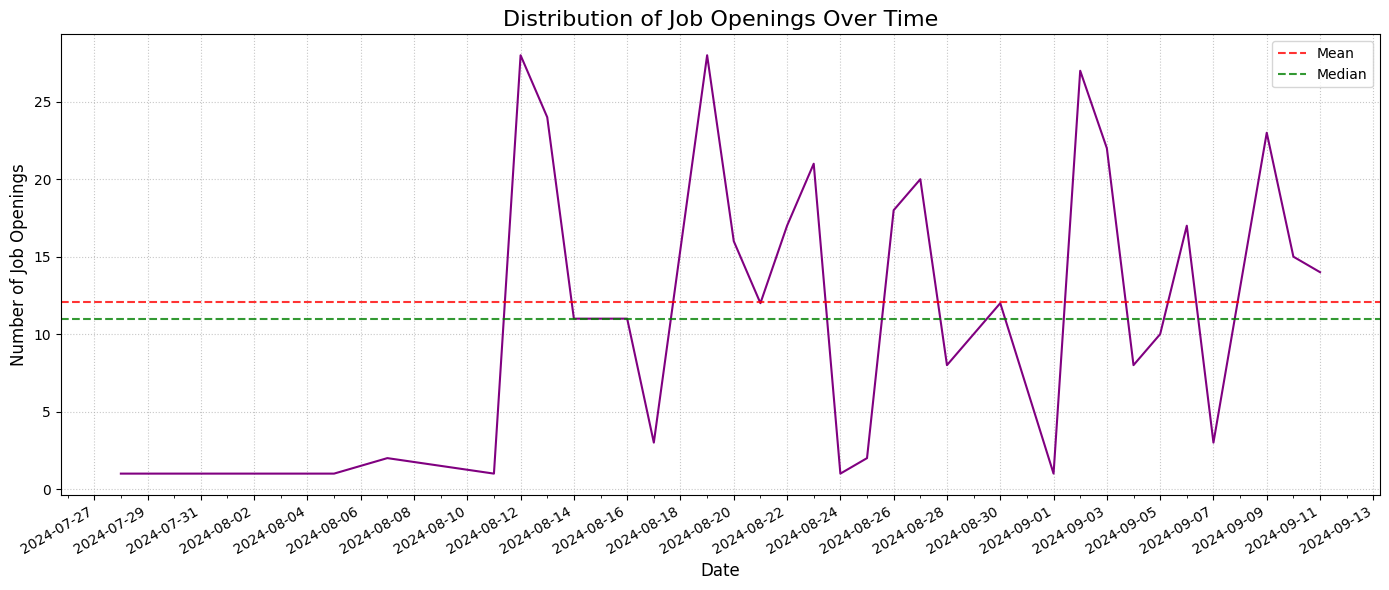

In [89]:
import matplotlib.dates as mdates


plt.figure(figsize=(14, 6))
date_counts = df_cleaned['Date'].dt.date.value_counts().sort_index()

# Create the line plot
sns.lineplot(x=date_counts.index, y=date_counts.values, color='purple')

# Customize the plot
plt.title('Distribution of Job Openings Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Job Openings', fontsize=12)

# Add grid with light lines
plt.grid(True, linestyle=':', alpha=0.7)

# Customize x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks every 2 days
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())  # Set minor ticks every day
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Format date labels
date_form = mdates.DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)

# Add dashed lines
plt.axhline(y=date_counts.mean(), color='r', linestyle='--', alpha=0.8, label='Mean')
plt.axhline(y=date_counts.median(), color='g', linestyle='--', alpha=0.8, label='Median')

plt.legend()
plt.tight_layout()
plt.show()

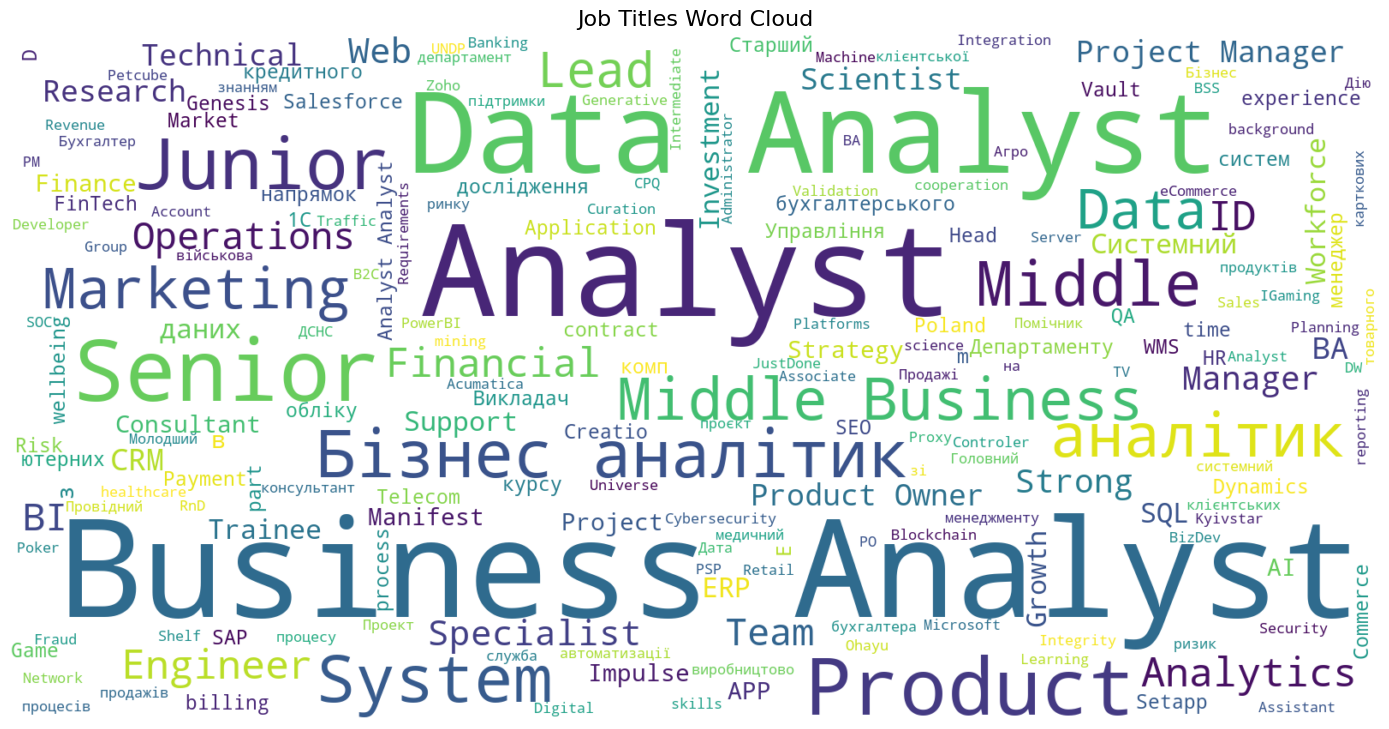

In [90]:
from wordcloud import WordCloud

plt.figure(figsize=(14, 8))
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(df_cleaned['Title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Titles Word Cloud', fontsize=16)
plt.tight_layout()
plt.show()